# Assignment 3
- Donwload  ziptrain.csv and ziptest.csv datasets from  https://github.com/vahidpartovinia/ycbs255/

# 1- Differentiate digit 2 from Digit 7
## 1.1- Two principal components
- Select only digit 2, and digit 7 from ziptrain data set. 
- Project ziprain onto two principal components
- Make a scatterplot to confirm wheather or not only two principal components separates digit 2 from digit 7.

## 1.2- Logistic regression
- Fit a logistic regression to separate digit 2 from digit 7 over the projected 2 principal components.  Remember in logistic regression, classes are differentiated using 0 and 1 (and not 2 or 7).
- Build the confusion matrix on ziptest and check how well the model works on the test data.

# 2 -Multiple principal components
- Project train data onto "m = 2, 3, ..." principal components.
- Choose an "m" so that the classification of digit 2 and 7 is the most precise on ziptest.

# 3-Differentiate all digits 
- Project ziptrain onto two principal components
- Make a scatterplot to confirm wheather or not only two principal components separates all digits properly.
- Use linear discriminant on ziptrain over 256 original pixels and build the confusion matrix of this model over ziptrain
- Use linear disciminant over "m" projected principal components, with the appropriate choice of "m" (where the precision of prediction maximizes over ziptest data set).


# Submission note
Please fill this jupyter notebook. Extract the pdf file as follows. On  Jupyter manue go to File/Print Preview, then on Browser menu go to File/Print. 

## Only PDF  Submissions will be graded


In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.decomposition import PCA

## 1.1- Two principal components

In [2]:
path='data/'
filename1=path+'ziptrain.csv'
zipdata=np.loadtxt(filename1)
zipdata.shape

(7291, 257)

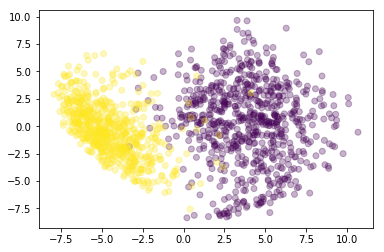

In [3]:
# prepare the training data set only contain 2 and 7, tranform to 2 components with PCA

zipdata2=zipdata[zipdata[:,0]==2]
zipdata7=zipdata[zipdata[:,0]==7]
zipdata27=np.vstack([zipdata2,zipdata7])

pca=PCA(n_components=2)
pca.fit(zipdata27[:,1:])
Z=pca.transform(zipdata27[:,1:])
plt.scatter(Z[:,0],Z[:,1],c=zipdata27[:,0],alpha=0.3)

It seems to be separable.

## 1.2- Logistic regression

In [4]:
#Convert the tabel 2 to class 0, table 7 to class 1, establish the training data set Z with shape (n,3)

Z_y=np.where(zipdata27[:,0]==7,1,0).reshape(-1,1)
Z=np.hstack([Z,Z_y])
#shuffle the dataset
np.random.shuffle(Z)         

In [5]:
Z.shape

(1376, 3)

In [6]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
X=Z[:,:-1]
y=Z[:,-1]
lr.fit(X,y)
lr.score(X,y)    #Return mean accuracy on trainning data

0.97747093023255816

In [7]:
# Establish test data containing 2&7 with the same method as the training set

filename2=path+'ziptest.csv'
ziptest=np.loadtxt(filename2)
ziptest.shape

ziptest2=ziptest[ziptest[:,0]==2]
ziptest7=ziptest[ziptest[:,0]==7]
ziptest27=np.vstack([ziptest2,ziptest7])

Z_test=pca.transform(ziptest27[:,1:])
Z_test_y=np.where(ziptest27[:,0]==7,1,0).reshape(-1,1)
Z_test=np.hstack([Z_test,Z_test_y])
#shuffle the test dataset
np.random.shuffle(Z_test)  

In [8]:
Z_test.shape

(345, 3)

In [9]:
X_test=Z_test[:,:-1]
y_test=Z_test[:,-1]
lr.score(X_test,y_test)   #Return mean accuracy on test data

0.9652173913043478

## 2 -Multiple principal components

In [10]:
n_comps=np.arange(2,256)
scores=np.zeros(254)
for m in n_comps:
    pca=PCA(n_components=m)
    pca.fit(zipdata27[:,1:])
    Z=pca.transform(zipdata27[:,1:])
    Z_y=np.where(zipdata27[:,0]==7,1,0).reshape(-1,1)
    Z=np.hstack([Z,Z_y])
    #shuffle the dataset
    np.random.shuffle(Z)   
    
    lr=LogisticRegression()
    X=Z[:,:-1]
    y=Z[:,-1]
    lr.fit(X,y)
    
    Z_test=pca.transform(ziptest27[:,1:])
    Z_test_y=np.where(ziptest27[:,0]==7,1,0).reshape(-1,1)
    Z_test=np.hstack([Z_test,Z_test_y])
    #shuffle the test dataset
    np.random.shuffle(Z_test) 
    
    X_test=Z_test[:,:-1]
    y_test=Z_test[:,-1]
    scores[m-2]=lr.score(X_test,y_test)

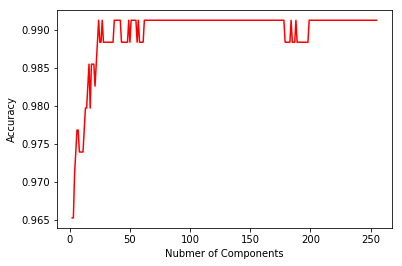

In [11]:
plt.plot(n_comps,scores,'r-')
plt.xlabel("Nubmer of Components")
plt.ylabel("Accuracy")

In [12]:
max(scores)

0.99130434782608701

In [13]:
m=np.where(scores==max(scores))[0][0]+2   #Since the n_component starts from 2

In [14]:
m

24

 m=24 is the least number of components that the classification of digit 2 and 7 is most precise on ziptest

# 3-Differentiate all digits

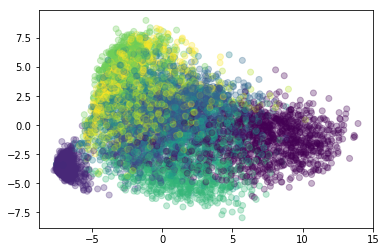

In [15]:
pca=PCA(n_components=2)
pca.fit(zipdata[:,1:])
Z=pca.transform(zipdata[:,1:])
plt.scatter(Z[:,0],Z[:,1],c=zipdata[:,0],alpha=0.3)

It seems that only two components can't separate these 10 classes properly.

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
X=zipdata[:,1:]
y=zipdata[:,0]
lda.fit(X,y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [17]:
X_test=ziptest[:,1:]
y_test=ziptest[:,0]
lda.score(X_test,y_test)

0.88540109616342799

The mean accuracy of LDA model on ziptest over 256 original pixels is 0.88540, which is quite lower than that of two classes problem.

In [18]:
n_comps=np.arange(2,256)
scores=np.zeros(254)
for m in n_comps:
    lda=LinearDiscriminantAnalysis()
    
    pca=PCA(n_components=m)
    pca.fit(zipdata[:,1:])
    X=pca.transform(zipdata[:,1:])  
    y=zipdata[:,0]
    lda.fit(X,y)
    
    X_test=pca.transform(ziptest[:,1:])
    y_test=ziptest[:,0]
    scores[m-2]=lda.score(X_test,y_test)
    

161
0.888390632785


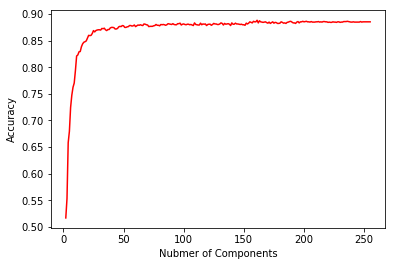

In [19]:
plt.plot(n_comps,scores,'r-')
plt.xlabel("Nubmer of Components")
plt.ylabel("Accuracy")
m=np.where(scores==max(scores))[0][0]+2   #Since the n_component starts from 2
print(m)
print(max(scores))

Use linear disciminant over the optimal "m=161" projected principal components, abtain an accuaracy of 0.88839，which is larger than the result(0.88540) form original variables.